<a href="https://colab.research.google.com/github/AdriaCoding/ADM2/blob/master/project2_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas scikit-learn statsmodels scipy pmdarima

In [ ]:
import pandas as pd

lynx_hare_url = "https://gist.github.com/michaelosthege/27315631c1aedbe55f5affbccabef1ca/raw/d4c59759a36a8ad9b821bff24733fb73b7424328/Leigh1968_harelynx.csv"
data = pd.read_csv(lynx_hare_url)


In [ ]:
data.head()

,year,hare,lynx
0,1847,21000,49000
1,1848,12000,21000
2,1849,24000,9000
3,1850,50000,7000
4,1851,80000,5000


In [ ]:
data['year'] = pd.to_datetime(data['year'], format="%Y")
data['hare'] /= 1000
data['lynx'] /= 1000


In [ ]:
data = data.set_index("year")
data.index.freq = data.index.inferred_freq

In [ ]:
import datetime

# clean data set
data['hare'][datetime.datetime(1862,1,1)] = 50



In [ ]:
# training split
train_end = datetime.date(1866,1,1)
train_data = data[:train_end]
test_data = data[train_end + datetime.timedelta(days = 1):]

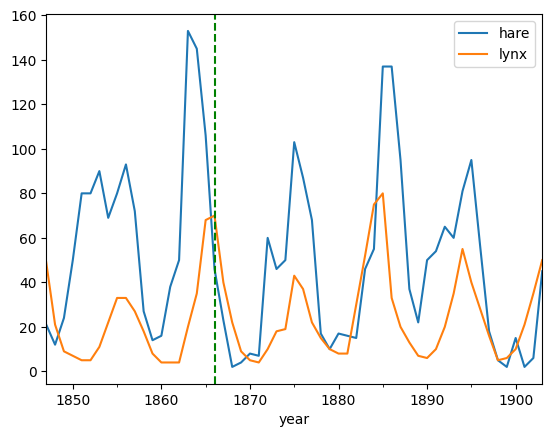

In [ ]:
import matplotlib
plot = data.plot()
matplotlib.pyplot.axvline(train_end, linestyle='--', c='green', label='training split')

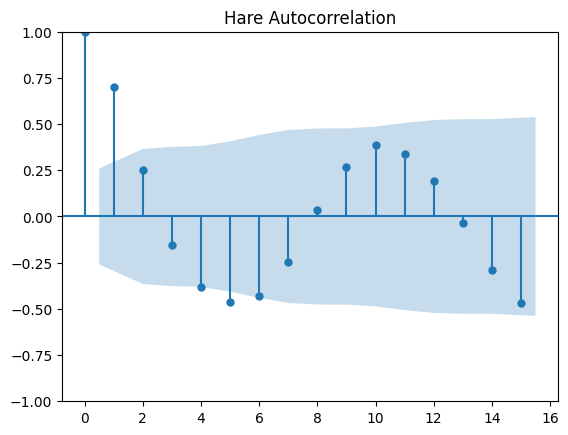

In [ ]:
import statsmodels.api as sm

_plot = sm.graphics.tsa.plot_acf(data['hare'].values.squeeze(), lags=15, title="Hare Autocorrelation")


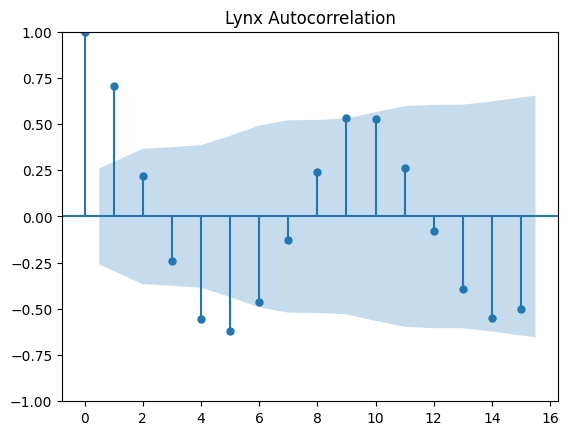

In [ ]:
_plot = sm.graphics.tsa.plot_acf(data['lynx'].values.squeeze(), lags=15, title="Lynx Autocorrelation")


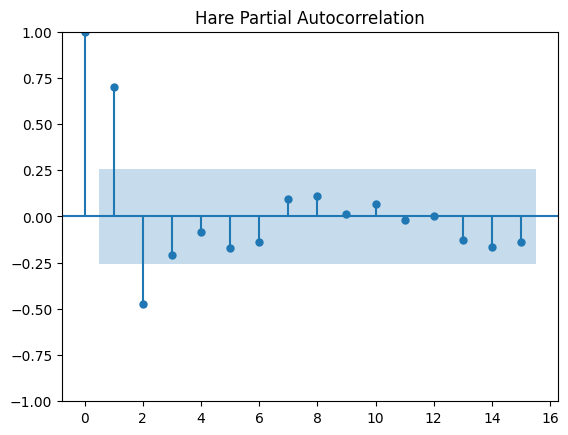

In [ ]:
_plot = sm.graphics.tsa.plot_pacf(data['hare'], lags=15, title="Hare Partial Autocorrelation")

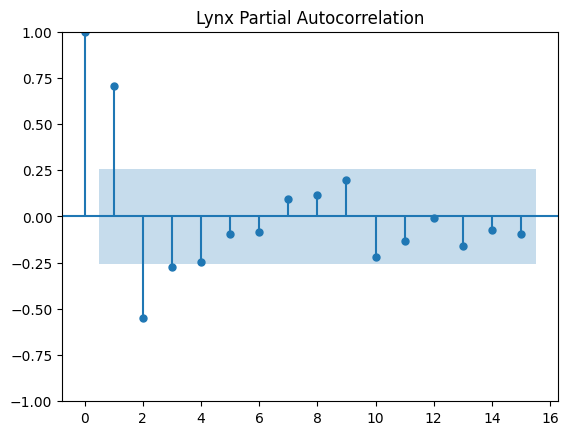

In [ ]:
_plot = sm.graphics.tsa.plot_pacf(data['lynx'], lags=15, title= "Lynx Partial Autocorrelation")

# Training models

## AR
Fitting an AR model without seasonal component

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['lynx'], order = (9, 0, 1)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   lynx   No. Observations:                   20
Model:                 ARIMA(9, 0, 1)   Log Likelihood                 -65.210
Date:                Fri, 31 May 2024   AIC                            154.419
Time:                        19:32:12   BIC                            166.368
Sample:                    01-01-1847   HQIC                           156.752
                         - 01-01-1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5183      9.587      2.766      0.006       7.728      45.308
ar.L1          1.6914      0.673      2.515      0.012       0.373       3.010
ar.L2         -0.2106      1.352     -0.156      0.876      -2.861       2.440
ar.L3         -1.6248      1.174     -1.384      0.166      -3.926       0.676
ar.L4          1.4934      2.069      0.722      0.470      -2.561       5.548
ar.L5         -0.0683      2.536     -0.027      0.979      -5.039       4.902
ar.L6         -1.3035      1.988     -0.656      0.512      -5.199       2.592
ar.L7          0.8484      1.087      0.780      0.435      -1.282       2.979
ar.L8          0.4942      1.326      0.373      0.709      -2.104       3.092
ar.L9         -0.5720      0.582     -0.983      0.325      -1.712       0.568
ma.L1         -0.9813      8.943     -0.110      0.913     -18.509      16.546
sigma2        16.8850    146.286      0.115      0.908    -269.831     303.601
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.12   Prob(JB):                         0.77
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model2 = ARIMA(train_data['lynx'], order = (5, 0, 0)).fit()
model2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   lynx   No. Observations:                   20
Model:                 ARIMA(5, 0, 0)   Log Likelihood                 -70.261
Date:                Fri, 31 May 2024   AIC                            154.522
Time:                        19:32:13   BIC                            161.492
Sample:                    01-01-1847   HQIC                           155.882
                         - 01-01-1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0451      5.978      3.688      0.000      10.328      33.762
ar.L1          1.3871      0.367      3.783      0.000       0.669       2.106
ar.L2         -0.6598      0.608     -1.085      0.278      -1.851       0.532
ar.L3         -0.7480      0.446     -1.676      0.094      -1.623       0.127
ar.L4          0.9094      0.986      0.923      0.356      -1.023       2.842
ar.L5         -0.5407      0.755     -0.717      0.474      -2.020       0.938
sigma2        48.8445     31.522      1.550      0.121     -12.938     110.626
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.36   Prob(JB):                         0.11
Heteroskedasticity (H):               1.81   Skew:                             1.06
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model3 = ARIMA(train_data['lynx'], order = (2, 0, 0)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   lynx   No. Observations:                   20
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -71.986
Date:                Fri, 31 May 2024   AIC                            151.972
Time:                        19:32:13   BIC                            155.955
Sample:                    01-01-1847   HQIC                           152.750
                         - 01-01-1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6377      7.380      3.203      0.001       9.173      38.103
ar.L1          1.4667      0.142     10.314      0.000       1.188       1.745
ar.L2         -0.8590      0.153     -5.603      0.000      -1.160      -0.559
sigma2        65.2429     24.400      2.674      0.007      17.420     113.066
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                10.79
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             1.43
Prob(H) (two-sided):                  0.36   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction_start_date = test_data.index[0]
prediction_end_date= test_data.index[-1]
def obtain_predictions(model):
  return model.predict(prediction_start_date, prediction_end_date)

def plot_predictions(predictions, name='lynx predicted'):
  pred_actual = test_data.copy()
  pred_actual[name] = predictions
  pred_actual.plot()

def obtain_predictions_one_year(model):
  m = model
  def forecast_advance(x):
    nonlocal m
    r = m.forecast(1)
    m = m.append([x])
    return r[0]
  return test_data['lynx'].apply(forecast_advance)

from sklearn import metrics

def mse_predictions(predictions, ds='lynx'):
  return metrics.mean_squared_error(test_data[ds], predictions)

In [ ]:
for j in range(0,2):
  for i in range(1,5):
    tmp_model = ARIMA(train_data['lynx'], order = (i, 0, j)).fit()
    tmp_predictions = obtain_predictions(tmp_model)
    print("mse model AR({}), MA({}): {}".format(i, j, mse_predictions(tmp_predictions)))


mse model AR(1), MA(0): 799.5861422169528
mse model AR(2), MA(0): 222.84603352658206
mse model AR(3), MA(0): 552.5048681560629


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


mse model AR(4), MA(0): 562.0031149096144
mse model AR(1), MA(1): 509.1940513370379


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


mse model AR(2), MA(1): 460.7264755071522
mse model AR(3), MA(1): 567.0743171982859


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


mse model AR(4), MA(1): 511.00958091903425


In [ ]:
predictions1_yearly = obtain_predictions_one_year(model)
predictions1_all = obtain_predictions(model)

predictions2_yearly = obtain_predictions_one_year(model2)
predictions2_all = obtain_predictions(model2)
predictions3_yearly = obtain_predictions_one_year(model3)
predictions3_all = obtain_predictions(model3)


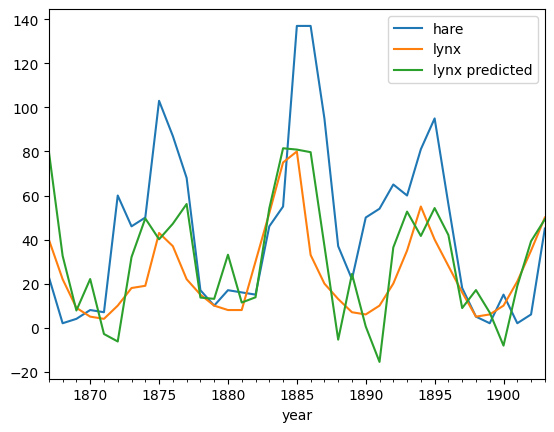

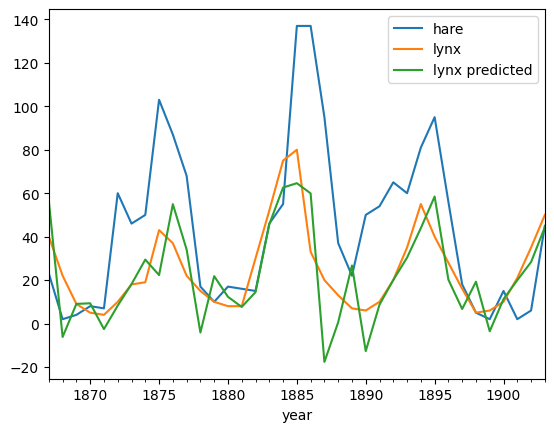

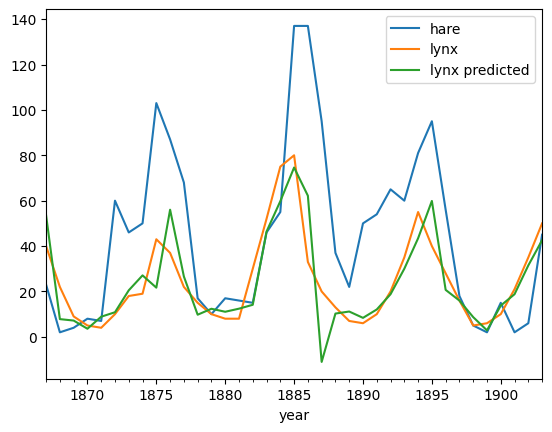

In [ ]:
plot_predictions(predictions1_yearly)
plot_predictions(predictions2_yearly)
plot_predictions(predictions3_yearly)


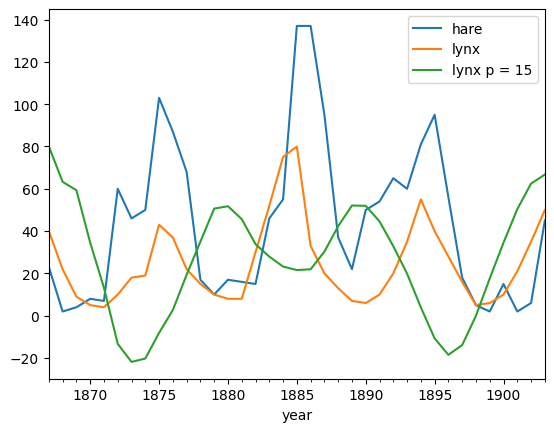

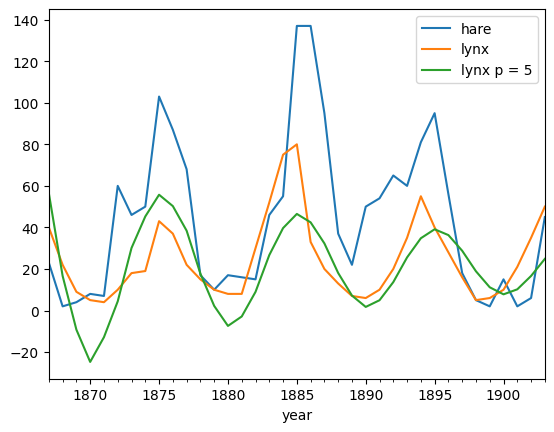

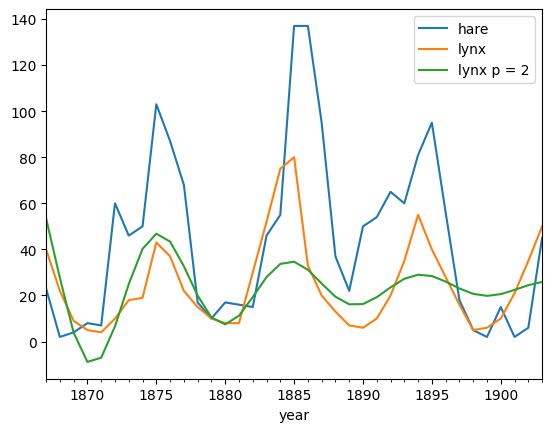

In [ ]:
plot_predictions(predictions1_all, 'lynx p = 15')
plot_predictions(predictions2_all, 'lynx p = 5')
plot_predictions(predictions3_all, 'lynx p = 2')

# Seasonal ARIMA



In [ ]:
seasonal_model = ARIMA(train_data['lynx'], order = (2, 0, 0), seasonal_order=(1,0,0,9)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [ ]:
seasonal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                            lynx   No. Observations:                   20
Model:             ARIMA(2, 0, 0)x(1, 0, 0, 9)   Log Likelihood                 -71.744
Date:                         Fri, 31 May 2024   AIC                            153.488
Time:                                 19:32:24   BIC                            158.466
Sample:                             01-01-1847   HQIC                           154.460
                                  - 01-01-1866                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4035      8.334      2.808      0.005       7.069      39.738
ar.L1          1.5011      0.112     13.343      0.000       1.281       1.722
ar.L2         -0.8980      0.192     -4.681      0.000      -1.274      -0.522
ar.S.L9       -0.2433      1.343     -0.181      0.856      -2.875       2.388
sigma2        61.6902     41.821      1.475      0.140     -20.277     143.657
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):                 6.29
Prob(Q):                              0.11   Prob(JB):                         0.04
Heteroskedasticity (H):               2.14   Skew:                             1.17
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

predictions_seasonal_yearly = obtain_predictions_one_year(seasonal_model)
predictions_seasonal_all = obtain_predictions(seasonal_model)

In [ ]:
print(mse_predictions(predictions_seasonal_all))

197.76857897498255


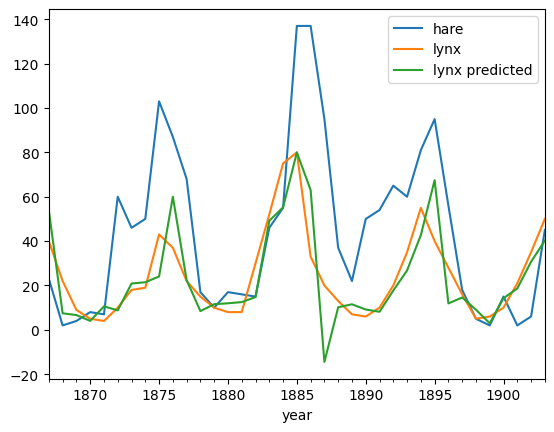

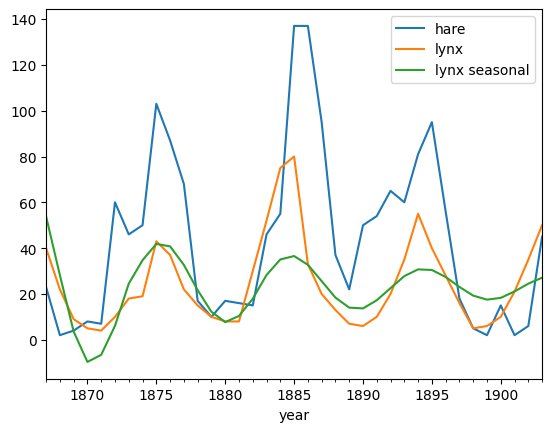

In [ ]:

plot_predictions(predictions_seasonal_yearly)
plot_predictions(predictions_seasonal_all, 'lynx seasonal')

In [ ]:
print("mse seasonal lynx: {}".format(mse_predictions(predictions_seasonal_all)))

mse seasonal lynx: 197.76857897498255


# Adding Exogynous Variables - Predicting Hares based on Lynx

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
hare_model1 = ARIMA(train_data['hare'], order = (15, 0, 0), exog=train_data['lynx']).fit()
hare_model2 = ARIMA(train_data['hare'], order = (5, 0, 0), exog=train_data['lynx']).fit()
hare_model3 = ARIMA(train_data['hare'], order = (1, 0, 0), exog=train_data['lynx']).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
hare_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   hare   No. Observations:                   20
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -96.886
Date:                Fri, 31 May 2024   AIC                            201.772
Time:                        19:32:29   BIC                            205.755
Sample:                    01-01-1847   HQIC                           202.549
                         - 01-01-1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2265     38.326      1.415      0.157     -20.891     129.344
lynx           0.1619      0.956      0.169      0.866      -1.713       2.037
ar.L1          0.6404      0.367      1.744      0.081      -0.079       1.360
sigma2       919.9676    269.656      3.412      0.001     391.452    1448.483
===================================================================================
Ljung-Box (L1) (Q):                   2.21   Jarque-Bera (JB):                12.32
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               4.56   Skew:                             1.28
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

def obtain_exog_predictions(model, exog_model):
  exog_predictions_data = exog_model.predict(prediction_start_date, prediction_end_date)
  return model.predict(prediction_start_date, prediction_end_date, exog=exog_predictions_data)

def obtain_exog_predictions_one_year(model, exog_model):
  m = model
  em = exog_model
  def forecast_advance(x):
    nonlocal m
    nonlocal em
    r = m.forecast(1, exog=em.forecast(1))
    m = m.append([x['hare']], exog=[x['lynx']])
    em.append([x['lynx']])
    return r[0]
  return test_data.apply(forecast_advance, axis=1)


In [ ]:
hare_predictions1_yearly = obtain_exog_predictions_one_year(hare_model1, seasonal_model)
hare_predictions1_all = obtain_exog_predictions(hare_model1, seasonal_model)
hare_predictions2_yearly = obtain_exog_predictions_one_year(hare_model2, seasonal_model)
hare_predictions2_all = obtain_exog_predictions(hare_model2, seasonal_model)
hare_predictions3_yearly = obtain_exog_predictions_one_year(hare_model3, seasonal_model)
hare_predictions3_all = obtain_exog_predictions(hare_model3, seasonal_model)

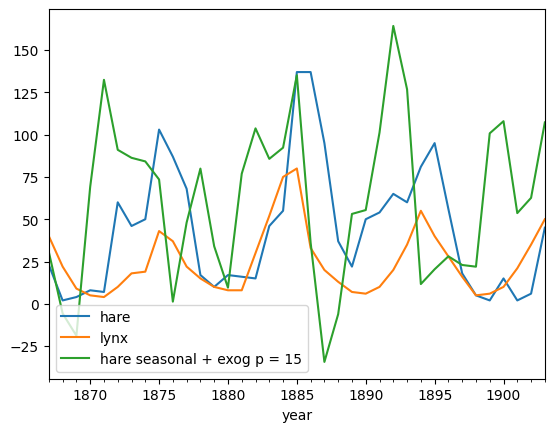

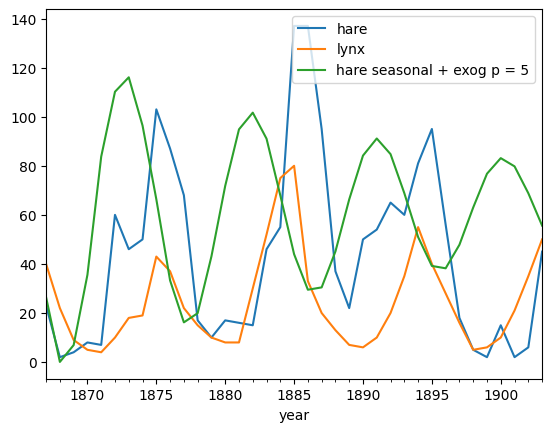

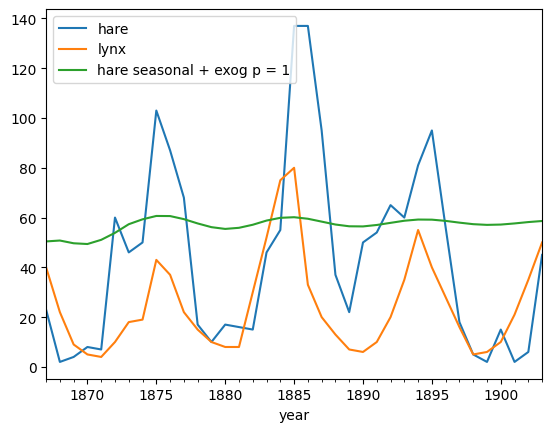

In [ ]:
plot_predictions(hare_predictions1_all, 'hare seasonal + exog p = 15')
plot_predictions(hare_predictions2_all, 'hare seasonal + exog p = 5')
plot_predictions(hare_predictions3_all, 'hare seasonal + exog p = 1')

In [ ]:
print("hare_predictions1_yearly mse: %E" % mse_predictions(hare_predictions1_all, 'hare'))
print("hare_predictions2_yearly mse: %E" % mse_predictions(hare_predictions2_all, 'hare'))
print("hare_predictions3_yearly mse: %E" % mse_predictions(hare_predictions3_all, 'hare'))

hare_predictions1_yearly mse: 3.717008E+03
hare_predictions2_yearly mse: 2.744276E+03
hare_predictions3_yearly mse: 1.415430E+03


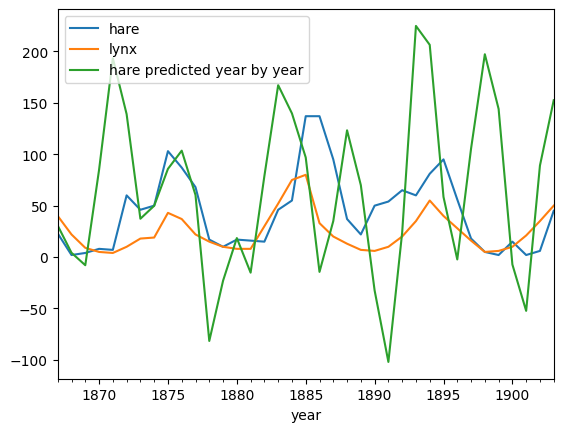

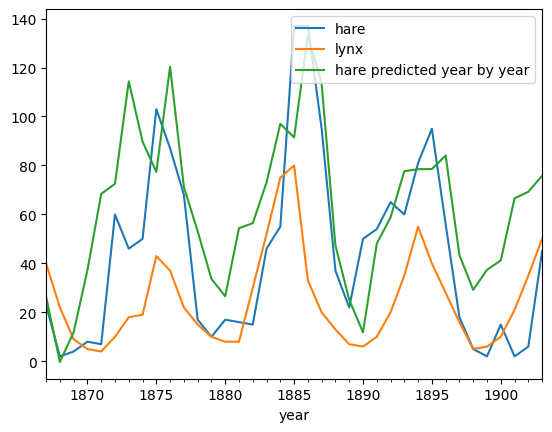

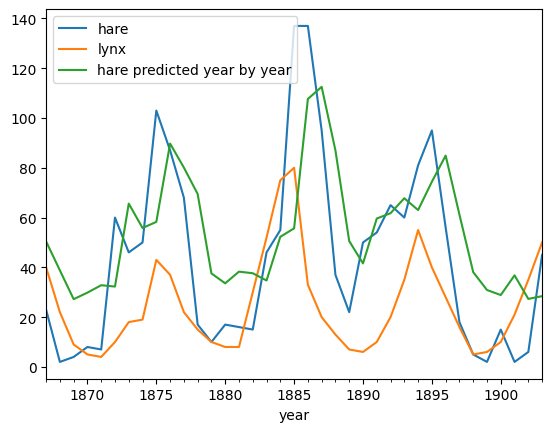

In [ ]:
plot_predictions(hare_predictions1_yearly, 'hare predicted year by year')
plot_predictions(hare_predictions2_yearly, 'hare predicted year by year')
plot_predictions(hare_predictions3_yearly, 'hare predicted year by year')

## Seasonal

In [ ]:
hare_seasonal_model = ARIMA(train_data['hare'], order = (3, 0, 0), seasonal_order=(1,0,1,9), exog=train_data['lynx'] ).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
for i in range(1,5):
  tmp_model = ARIMA(train_data['hare'], order = (i, 0, 0),seasonal_order=(1,0,1,9), exog=train_data['lynx']).fit()
  tmp_predictions = obtain_exog_predictions(tmp_model, seasonal_model)
  print("mse model {}: {}".format(i, mse_predictions(tmp_predictions, 'hare')))



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


mse model 1: 1447.4078398494844


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


mse model 2: 1441.7132611264858


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


mse model 3: 1930.3164519600298


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


mse model 4: 2203.742900654997


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
for i in range(1,10):
  tmp_model = ARIMA(train_data['hare'], order = (i, 0, 0)).fit()
  tmp_predictions = obtain_predictions(tmp_model)
  print("mse model {}: {}".format(i, mse_predictions(tmp_predictions, 'hare')))


mse model 1: 1540.2220686452536
mse model 2: 1622.7039271656818
mse model 3: 2103.926137254583
mse model 4: 2777.5231598055966
mse model 5: 2757.815852612875


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


mse model 6: 2749.6248982006146


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


mse model 7: 2480.778310950973


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


mse model 8: 2496.1727381704773


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


mse model 9: 3116.08348744453


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:

hare_predictions_seasonal_yearly = obtain_exog_predictions_one_year(hare_seasonal_model, seasonal_model)
hare_predictions_seasonal_all = obtain_exog_predictions(hare_seasonal_model, seasonal_model)

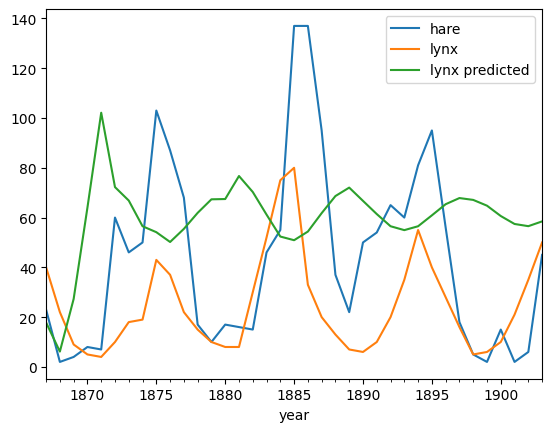

In [ ]:
plot_predictions(hare_predictions_seasonal_all)

In [ ]:
# predictions1_all
# predictions2_all
# predictions3_all
# predictions_seasonal_all
# hare_predictions_seasonal_all

# predictions1_yearly
# predictions2_yearly
# predictions3_yearly
# predictions_seasonal_yearly

print("predictions1_yearly mse: %E" % mse_predictions(predictions1_yearly))
print("predictions2_yearly mse: %E" % mse_predictions(predictions2_yearly))
print("predictions3_yearly mse: %E" % mse_predictions(predictions3_yearly))
print("predictions_seasonal_yearly mse: %E" % mse_predictions(predictions_seasonal_yearly))

print("predictions_seasonal_all mse: %E" % mse_predictions(predictions_seasonal_all))

predictions1_yearly mse: 3.028744E+02
predictions2_yearly mse: 1.993603E+02
predictions3_yearly mse: 1.215860E+02
predictions_seasonal_yearly mse: 1.515068E+02
predictions_seasonal_all mse: 1.977686E+02


In [ ]:

print("hare_predictions1_yearly mse: %E" % mse_predictions(hare_predictions1_yearly, 'hare'))
print("hare_predictions2_yearly mse: %E" % mse_predictions(hare_predictions2_yearly, 'hare'))
print("hare_predictions3_yearly mse: %E" % mse_predictions(hare_predictions3_yearly, 'hare'))
print("hare_predictions_seasonal_yearly mse: %E" % mse_predictions(hare_predictions_seasonal_yearly, 'hare'))
print("hare_predictions_seasonal_all mse: %E" % mse_predictions(hare_predictions_seasonal_all, 'hare'))


hare_predictions1_yearly mse: 7.851100E+03
hare_predictions2_yearly mse: 1.034428E+03
hare_predictions3_yearly mse: 8.335572E+02
hare_predictions_seasonal_yearly mse: 1.628070E+03
hare_predictions_seasonal_all mse: 1.930316E+03


In [ ]:

simple_hare_model1 = ARIMA(train_data['hare'], order = (15, 0, 0),).fit()
simple_hare_model2 = ARIMA(train_data['hare'], order = (5, 0, 0), ).fit()
simple_hare_model3 = ARIMA(train_data['hare'], order = (2, 0, 0), ).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
simple_hare_predictions1_yearly = obtain_predictions_one_year(simple_hare_model1)
simple_hare_predictions1_all = obtain_predictions(simple_hare_model1)
simple_hare_predictions2_yearly = obtain_predictions_one_year(simple_hare_model2)
simple_hare_predictions2_all = obtain_predictions(simple_hare_model2)
simple_hare_predictions3_yearly = obtain_predictions_one_year(simple_hare_model3)
simple_hare_predictions3_all = obtain_predictions(simple_hare_model3)

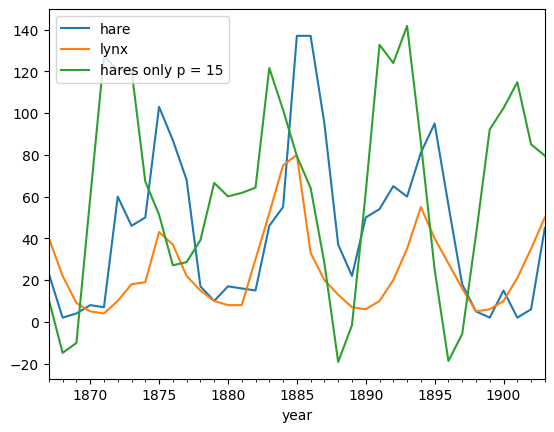

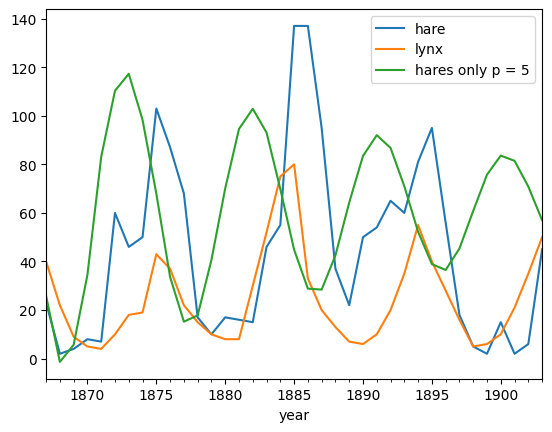

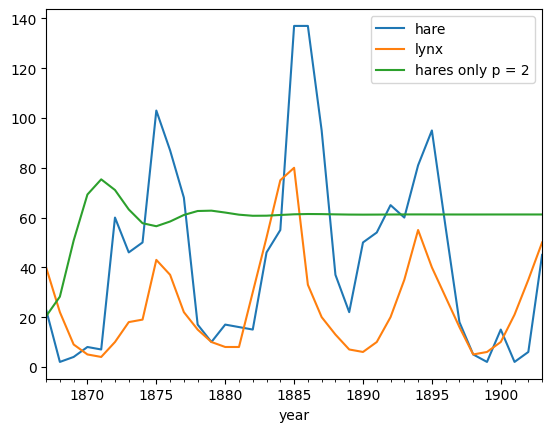

In [ ]:
plot_predictions(simple_hare_predictions1_all, 'hares only p = 15')
plot_predictions(simple_hare_predictions2_all, 'hares only p = 5')
plot_predictions(simple_hare_predictions3_all, 'hares only p = 2')

In [ ]:
print("hare_predictions1_yearly mse: %E" % mse_predictions(simple_hare_predictions1_yearly, 'hare'))
print("hare_predictions2_yearly mse: %E" % mse_predictions(simple_hare_predictions2_yearly, 'hare'))
print("hare_predictions3_yearly mse: %E" % mse_predictions(simple_hare_predictions3_yearly, 'hare'))

hare_predictions1_yearly mse: 2.803255E+03
hare_predictions2_yearly mse: 1.370374E+03
hare_predictions3_yearly mse: 9.085854E+02


# Baseline

In [ ]:
import numpy as np

baseline_lynx = [np.mean(data['lynx'])] * len(test_data['lynx'])
print("Baseline lynx mse for mean({}): {}".format(np.mean(data['lynx']), mse_predictions(baseline_lynx)) )

baseline_hare = [np.mean(data['hare'])] * len(test_data['hare'])
print("Baseline hare mse for mean({}): {}".format(np.mean(data['hare']), mse_predictions(baseline_hare)) )


Baseline lynx mse for mean(24.035087719298247): 365.64893147995645
Baseline hare mse for mean(50.56140350877193): 1029.5740643690783
